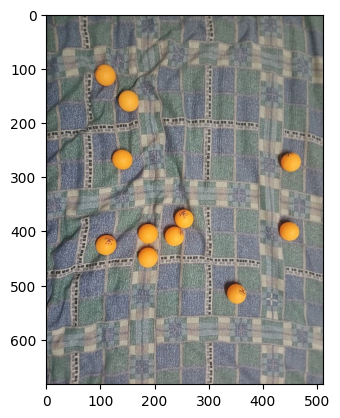

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci

from skimage import io, morphology, feature
from skimage import color, restoration

ping_pong = io.imread("PingPong.jpg")
plt.imshow(ping_pong)

In [3]:
ping_pong.shape

(683, 512, 3)

(array([2.380e+02, 1.500e+01, 1.600e+01, 1.900e+01, 1.000e+01, 2.600e+01,
        1.800e+01, 1.700e+01, 2.600e+01, 1.500e+01, 2.300e+01, 2.600e+01,
        2.400e+01, 2.900e+01, 2.200e+01, 3.200e+01, 3.100e+01, 2.800e+01,
        4.600e+01, 4.300e+01, 3.900e+01, 4.900e+01, 4.300e+01, 5.600e+01,
        6.800e+01, 6.700e+01, 8.100e+01, 9.000e+01, 1.030e+02, 1.140e+02,
        1.070e+02, 1.520e+02, 1.550e+02, 1.630e+02, 1.910e+02, 1.870e+02,
        2.470e+02, 2.710e+02, 2.710e+02, 3.270e+02, 3.910e+02, 3.430e+02,
        3.570e+02, 3.630e+02, 3.840e+02, 4.220e+02, 3.890e+02, 4.350e+02,
        3.930e+02, 3.990e+02, 4.210e+02, 4.270e+02, 4.170e+02, 4.090e+02,
        3.960e+02, 4.110e+02, 3.840e+02, 4.370e+02, 3.690e+02, 4.050e+02,
        3.950e+02, 4.090e+02, 4.560e+02, 4.420e+02, 4.260e+02, 4.660e+02,
        4.570e+02, 4.840e+02, 5.020e+02, 5.820e+02, 5.840e+02, 5.940e+02,
        6.650e+02, 7.100e+02, 7.580e+02, 7.380e+02, 8.110e+02, 8.770e+02,
        9.720e+02, 1.008e+03, 1.103e+0

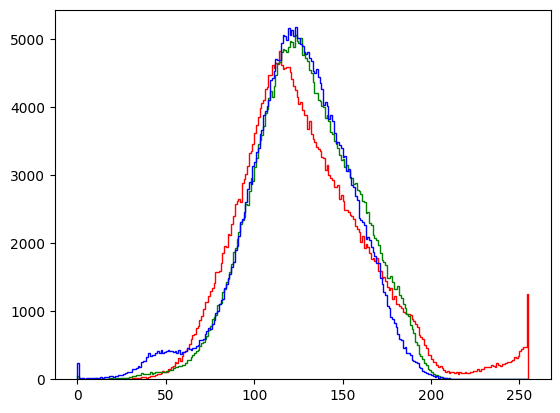

In [4]:
red = ping_pong[:,:,0]
green = ping_pong[:,:,1]
blue = ping_pong[:,:,2]

fig, ax = plt.subplots()
ax.hist(np.ravel(red), bins = np.arange(0, 256, 1), color='r', histtype='step')
ax.hist(np.ravel(green), bins = np.arange(0, 256, 1),color='g', histtype='step')
ax.hist(np.ravel(blue),bins = np.arange(0, 256, 1), color='b', histtype='step')


(array([[ 1.,  7., 50., ...,  8.,  1.,  0.],
        [ 2.,  5., 41., ..., 13.,  1.,  0.],
        [ 0.,  2., 34., ..., 19.,  1.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 16.,  0.,  0.],
        [ 0.,  0.,  1., ...,  5.,  0.,  0.],
        [ 0.,  0.,  4., ...,  9.,  0.,  0.]], shape=(512, 10)),
 array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. ,
        202.5, 225. ]),
 <a list of 512 BarContainer objects>)

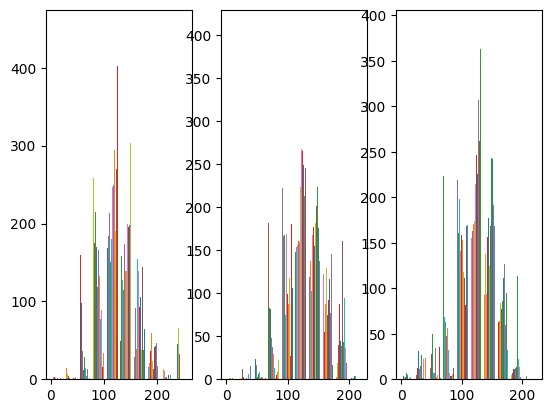

In [5]:
fig, ax = plt.subplots(1,3)
ax[0].hist(red)
ax[1].hist(green)
ax[2].hist(blue)

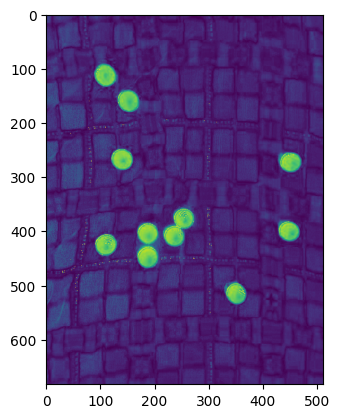

In [6]:
to_hsv = color.rgb2hsv(ping_pong)

balls = to_hsv[:,:,1]
plt.imshow(balls)

(array([1.6920e+03, 7.3820e+03, 8.7100e+03, 1.7818e+04, 2.5371e+04,
        2.5518e+04, 2.7600e+04, 2.8879e+04, 2.8344e+04, 2.7003e+04,
        2.5295e+04, 2.3029e+04, 1.9906e+04, 1.6055e+04, 1.2588e+04,
        9.4840e+03, 6.9520e+03, 5.2370e+03, 4.0090e+03, 3.1370e+03,
        2.3820e+03, 1.9140e+03, 1.5650e+03, 1.2920e+03, 1.0430e+03,
        8.6600e+02, 6.9600e+02, 4.8600e+02, 3.9000e+02, 2.9800e+02,
        2.2600e+02, 1.8100e+02, 1.4700e+02, 1.1800e+02, 1.0200e+02,
        9.4000e+01, 8.7000e+01, 8.7000e+01, 1.0600e+02, 7.8000e+01,
        7.2000e+01, 6.6000e+01, 7.6000e+01, 8.0000e+01, 8.7000e+01,
        8.3000e+01, 8.7000e+01, 9.2000e+01, 8.9000e+01, 1.0000e+02,
        7.8000e+01, 9.0000e+01, 9.3000e+01, 9.6000e+01, 8.9000e+01,
        1.0700e+02, 1.0600e+02, 1.1800e+02, 1.0100e+02, 1.2400e+02,
        1.4400e+02, 1.1100e+02, 1.1900e+02, 1.3900e+02, 1.7000e+02,
        1.8000e+02, 2.1500e+02, 2.8100e+02, 3.0300e+02, 3.5000e+02,
        3.4700e+02, 4.3500e+02, 5.1100e+02, 5.30

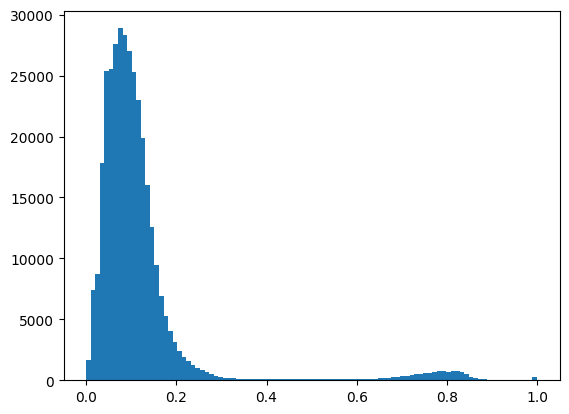

In [7]:
plt.hist(np.ravel(balls), bins = np.linspace(0, 1, 100), )

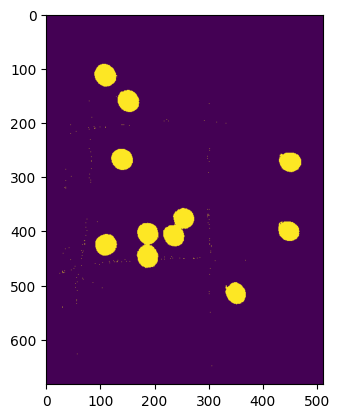

In [8]:
kindaclean = balls > 0.4

plt.imshow(kindaclean)

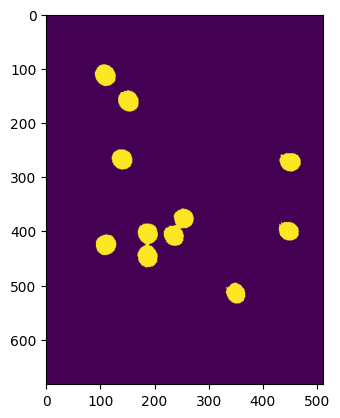

In [9]:
kindaclean_erode = morphology.erosion(kindaclean)
plt.imshow(kindaclean_erode)

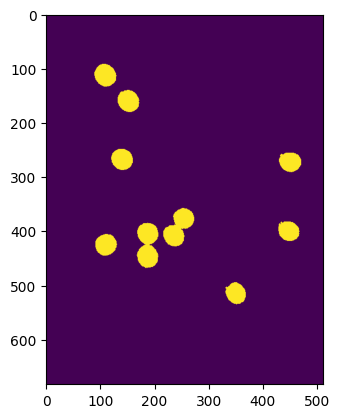

In [10]:
kindaclean_dilate = morphology.dilation(kindaclean_erode)
plt.imshow(kindaclean_dilate)

In [11]:
img = kindaclean_dilate
for _ in range(9):
    img = morphology.erosion(img)

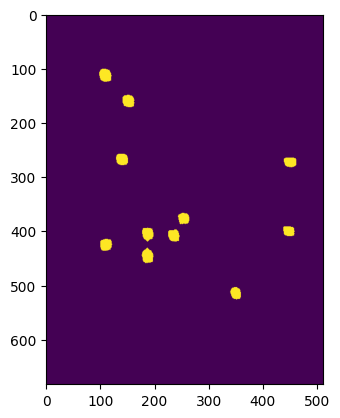

In [12]:
plt.imshow(img)

Blob at coordinates: (101, 98) to (125, 121)
Centroid of the blob: (np.float64(112.58888888888889), np.float64(108.79777777777778))
Blob at coordinates: (149, 141) to (172, 163)
Centroid of the blob: (np.float64(160.1208530805687), np.float64(151.36255924170615))
Blob at coordinates: (258, 129) to (279, 151)
Centroid of the blob: (np.float64(267.8045112781955), np.float64(139.65664160401002))
Blob at coordinates: (265, 438) to (283, 461)
Centroid of the blob: (np.float64(272.85434173669466), np.float64(449.3809523809524))
Blob at coordinates: (367, 243) to (388, 264)
Centroid of the blob: (np.float64(377.00560224089634), np.float64(253.25210084033614))
Blob at coordinates: (392, 437) to (410, 458)
Centroid of the blob: (np.float64(400.3), np.float64(446.8242424242424))
Blob at coordinates: (394, 177) to (420, 198)
Centroid of the blob: (np.float64(405.4140435835351), np.float64(186.9685230024213))
Blob at coordinates: (397, 225) to (420, 246)
Centroid of the blob: (np.float64(408.37467

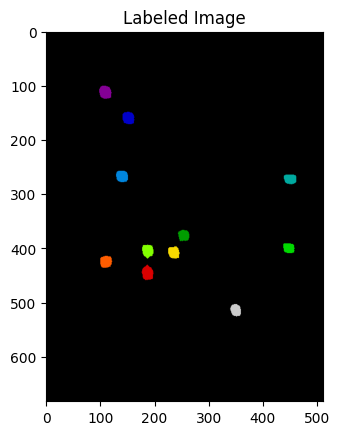

In [13]:
from skimage import measure

labeled_image = measure.label(img)

# Get properties of each labeled region
regions = measure.regionprops(labeled_image)

coordinates = []
# Iterate through each region and get the coordinates
for region in regions:
    # Get the coordinates of the bounding box of the region
    min_row, min_col, max_row, max_col = region.bbox
    print(f"Blob at coordinates: ({min_row}, {min_col}) to ({max_row}, {max_col})")
    
    # Optionally, you can get the centroid of the blob
    centroid = region.centroid
    coordinates.append(centroid)
    print(f"Centroid of the blob: {centroid}")

# Display the labeled image
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title('Labeled Image')
plt.show()

In [14]:
coordinates = np.array(coordinates)

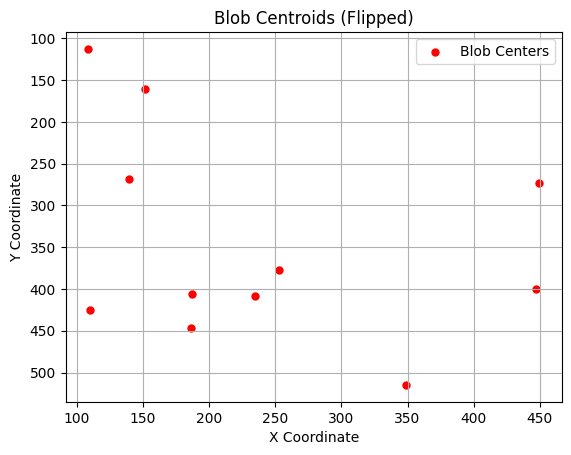

In [15]:
# Extract x and y coordinates
y_coords, x_coords = coordinates[:, 0], coordinates[:, 1]


plt.scatter(x_coords, y_coords, color='red', marker='.', s=100, label="Blob Centers")
plt.gca().invert_yaxis()

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Blob Centroids (Flipped)")
plt.legend()
plt.grid(True)

plt.show()

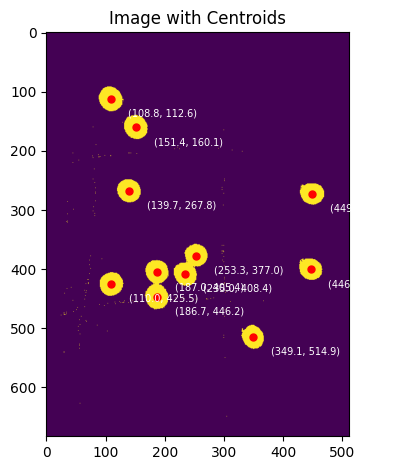

In [16]:
# Get properties of each labeled region
regions = measure.regionprops(labeled_image)

# Plot the original image
plt.imshow(kindaclean)

# Iterate through each region to plot the centroids
for region in regions:
    centroid = region.centroid
    plt.text(centroid[1] + 30, centroid[0]+ 30, f"({centroid[1]:.1f}, {centroid[0]:.1f})", size = 7, color = 'w')

plt.scatter(x_coords, y_coords, color='red', marker='.', s=100, label="Blob Centers")
plt.title('Image with Centroids')
plt.tight_layout()
plt.show()

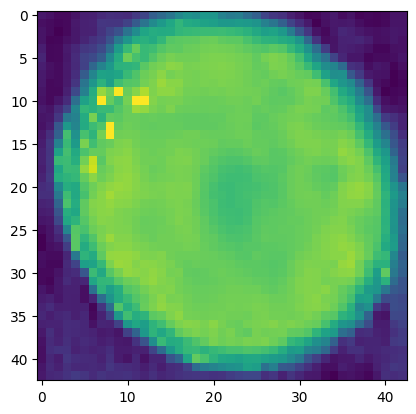

In [17]:
sample = balls[92:135,87:130]
plt.imshow(sample)

In [18]:
sample

array([[0.06617647, 0.04761905, 0.02586207, ..., 0.02272727, 0.05434783,
        0.05084746],
       [0.04255319, 0.02777778, 0.01801802, ..., 0.025     , 0.05813953,
        0.05660377],
       [0.05263158, 0.02941176, 0.        , ..., 0.04854369, 0.0625    ,
        0.06015038],
       ...,
       [0.04054054, 0.11214953, 0.0794702 , ..., 0.11504425, 0.13571429,
        0.1483871 ],
       [0.06015038, 0.12      , 0.0915493 , ..., 0.12612613, 0.16153846,
        0.15068493],
       [0.06956522, 0.11009174, 0.12      , ..., 0.13402062, 0.12804878,
        0.13836478]], shape=(43, 43))

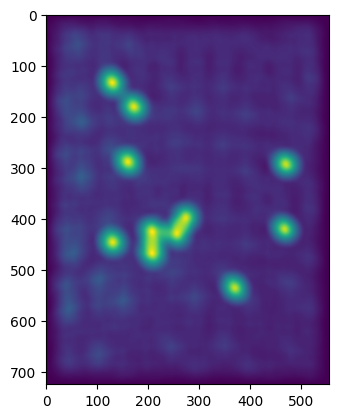

In [19]:
cor =  sci.signal.correlate2d(balls, sample, mode = 'full')

plt.imshow(cor)


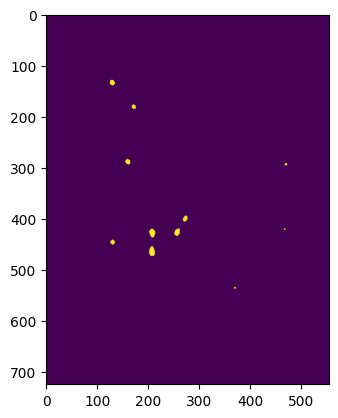

In [20]:
cor_clean = cor>660
plt.imshow(cor_clean)

In [21]:
blob = feature.blob_doh(cor_clean)

blob

array([[133.        , 128.        ,   7.44444444],
       [288.        , 159.        ,   7.44444444],
       [427.        , 255.        ,   7.44444444],
       [427.        , 207.        ,   7.44444444],
       [180.        , 170.        ,   4.22222222],
       [399.        , 271.        ,   7.44444444],
       [293.        , 469.        ,   4.22222222],
       [446.        , 129.        ,   7.44444444],
       [464.        , 207.        ,  10.66666667],
       [535.        , 369.        ,   4.22222222],
       [420.        , 467.        ,   4.22222222]])

In [22]:
x, y = blob[:,0], blob[:,1]

print(blob)
print(blob.shape)


[[133.         128.           7.44444444]
 [288.         159.           7.44444444]
 [427.         255.           7.44444444]
 [427.         207.           7.44444444]
 [180.         170.           4.22222222]
 [399.         271.           7.44444444]
 [293.         469.           4.22222222]
 [446.         129.           7.44444444]
 [464.         207.          10.66666667]
 [535.         369.           4.22222222]
 [420.         467.           4.22222222]]
(11, 3)


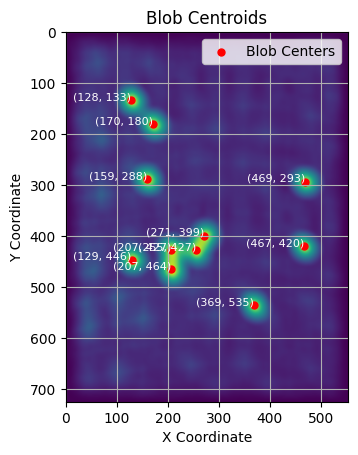

In [23]:
plt.scatter(y, x, color='red', marker='.', s=100, label="Blob Centers")
plt.gca().invert_yaxis()

# Annotate the coordinates for each blob
for row in blob:
    y_coord, x_coord, r = row  # Unpack the row
    plt.text(x_coord, y_coord, f'({int(x_coord)}, {int(y_coord)})', fontsize=8, ha='right', color='white')

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Blob Centroids")
plt.legend()
plt.grid(True)
plt.imshow(cor)

plt.show()


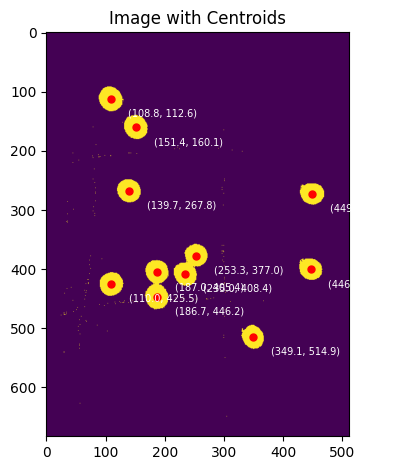

In [24]:
# Get properties of each labeled region
regions = measure.regionprops(labeled_image)

# Plot the original image
plt.imshow(kindaclean)

# Iterate through each region to plot the centroids
for region in regions:
    centroid = region.centroid
    plt.text(centroid[1] + 30, centroid[0]+ 30, f"({centroid[1]:.1f}, {centroid[0]:.1f})", size = 7, color = 'w')

plt.scatter(x_coords, y_coords, color='red', marker='.', s=100, label="Blob Centers")
plt.title('Image with Centroids')
plt.tight_layout()
plt.show()

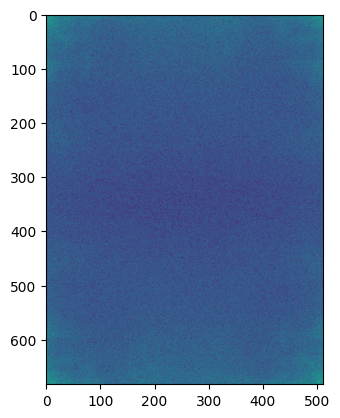

In [25]:
img = color.rgb2gray(ping_pong)

im_ft = np.fft.fft2(img)

plt.imshow(np.log(1 + np.abs(im_ft)))


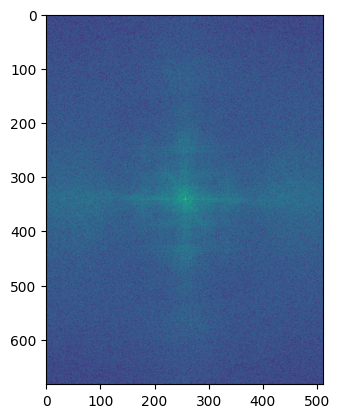

In [26]:
im_ft_shift = np.fft.fftshift(im_ft)
plt.imshow(np.log(1 + np.abs(im_ft_shift)))

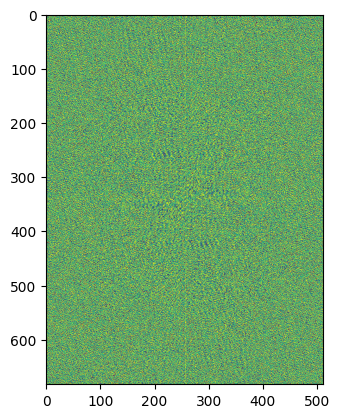

In [27]:
im_ftph = np.angle(im_ft_shift)
plt.imshow(np.log(1 + np.abs(im_ftph)))

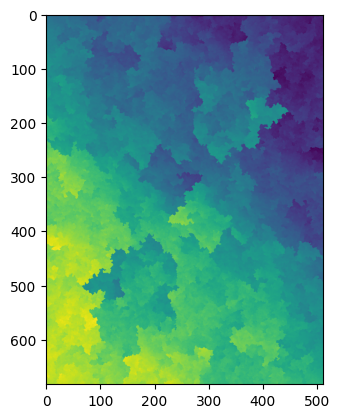

In [28]:
im_ftph_unwrap = restoration.unwrap_phase(np.fft.fftshift(im_ftph))
plt.imshow(im_ftph_unwrap)

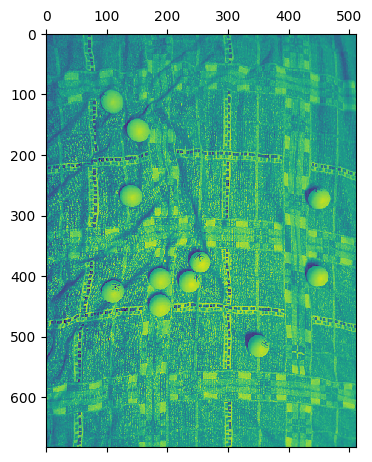

In [29]:
r = np.abs(im_ft)
theta = np.angle(im_ft)

plt.matshow(np.abs(np.fft.ifft2(r*np.exp(1j*theta))))
#need it a e^(itheta) not just inverting the fft

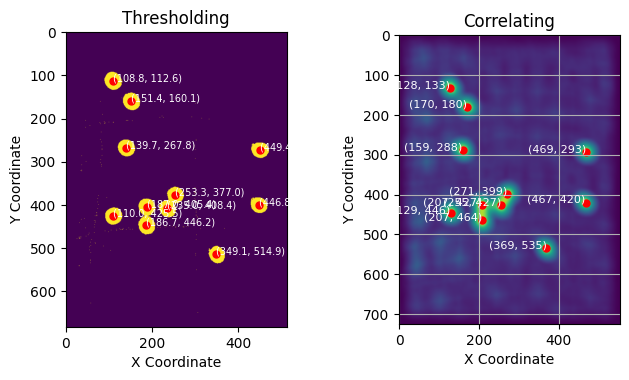

In [46]:
fig, ax = plt.subplots(1,2)
# Plot the original image
ax[0].imshow(kindaclean)

# Iterate through each region to plot the centroids
for region in regions:
    centroid = region.centroid
    ax[0].text(centroid[1], centroid[0], f"({centroid[1]:.1f}, {centroid[0]:.1f})", size = 7, color = 'w')

ax[0].scatter(x_coords, y_coords, color='red', marker='.', s=100, label="Blob Centers")
ax[0].set_title('Thresholding')
ax[0].set_xlabel("X Coordinate")
ax[0].set_ylabel("Y Coordinate")

ax[1].scatter(y, x, color='red', marker='.', s=100, label="Blob Centers")
ax[1].invert_yaxis()

# Annotate the coordinates for each blob
for row in blob:
    y_coord, x_coord, r = row  # Unpack the row
    plt.text(x_coord, y_coord, f'({int(x_coord)}, {int(y_coord)})', fontsize=8, ha='right', color='white')

ax[1].set_xlabel("X Coordinate")
ax[1].set_ylabel("Y Coordinate")
ax[1].set_title("Correlating")
ax[1].grid(True)
ax[1].imshow(cor)
fig.tight_layout()

plt.show()